In [ ]:
!pip install keras scikit-learn imbalanced-learn

In [ ]:
import numpy as np
import keras
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, color=True, resize=1.0,
                              slice_=(slice(48, 202), slice(48, 202)))

X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('number of examples: {}'.format(y.shape[0]))
print('dimensionality of images: {}'.format(X.shape[1:]))
print('number of unique classes (people): {}'.format(n_classes))

number of examples: 3023
dimensionality of images: (154, 154, 3)
number of unique classes (people): 62


In [ ]:
print (target_names)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

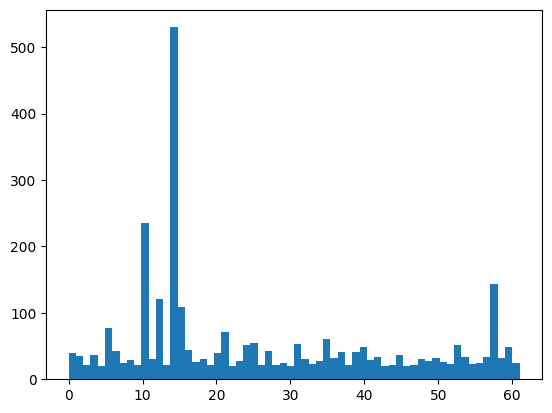

In [ ]:
_ = plt.hist(y, bins=n_classes)

In [ ]:
X = X / 255.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical

# Load LFW dataset (you've already done this part)
lfw_people = fetch_lfw_people(min_faces_per_person=20, color=True, resize=1.0)
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Reshape the images to match the input shape expected by the model (154x154x3)
X = np.array([np.resize(image, (154, 154, 3)) for image in X])  # Resize images to (154, 154, 3)

# Normalize images to be between 0 and 1
X = X.astype('float32') / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

# Define CNN Model
face_recognition_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(154, 154, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(n_classes, activation='softmax')  # Output layer for n_classes (15 in this case)
])

# Compile the Model
face_recognition_model.compile(optimizer='adam',
                                loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
                                metrics=['accuracy'])

# Train the Model
face_recognition_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss, test_acc = face_recognition_model.evaluate(X_test, y_test)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.0901 - loss: 6.4333 - val_accuracy: 0.0149 - val_loss: 4.0264
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.2233 - loss: 3.4320 - val_accuracy: 0.0975 - val_loss: 3.9233
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3301 - loss: 2.8916 - val_accuracy: 0.0975 - val_loss: 3.9258
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4388 - loss: 2.2504 - val_accuracy: 0.0893 - val_loss: 4.0003
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5591 - loss: 1.6590 - val_accuracy: 0.0975 - val_loss: 4.3262
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6721 - loss: 1.1827 - val_accuracy: 0.0215 - val_loss: 4.9479
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7507 - loss: 0.9085 - val_accuracy: 0.1603 - val_loss: 4.7753
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7537 - loss: 0.8250 - val_accuracy: 0.0264 

In [ ]:
# Save Model
face_recognition_model.save('face_recognition_lfw.h5')

# Load Model
from tensorflow.keras.models import load_model
model = load_model('face_recognition_lfw.h5')


In [ ]:
model.save('face_recognition_model.keras')


In [ ]:
import zipfile
import os

zip_path = '/content/archive.zip'  # Path to the zip file
extract_to = '/content/fer_dataset'  # Extraction directory

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted!")

# Correcting the train and test directories
train_dir = os.path.join(extract_to, 'train')
test_dir = os.path.join(extract_to, 'test')

# Verify directory structure
print("Train directory contents:", os.listdir(train_dir))
print("Test directory contents:", os.listdir(test_dir))

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
img_width, img_height = 48, 48
batch_size = 32
num_classes = 7  # Number of emotions: angry, disgust, fear, happy, neutral, sad, surprise

# Prepare data generators with data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image pixels
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear images for data augmentation
    zoom_range=0.2,  # Zoom in or out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill missing pixels during transformation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Load the data from the corrected paths
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define CNN model for emotion detection
emotion_detection_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for emotion classes (7 emotions)
])

# Compile the model
emotion_detection_model.compile(optimizer='adam',
                                loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class
                                metrics=['accuracy'])

# Train the model
emotion_detection_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = emotion_detection_model.evaluate(test_generator)


Dataset extracted!
Train directory contents: ['fear', 'disgust', 'neutral', 'sad', 'surprise', 'happy', 'angry']
Test directory contents: ['fear', 'disgust', 'neutral', 'sad', 'surprise', 'happy', 'angry']
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.2167 - loss: 2.5747 - val_accuracy: 0.2796 - val_loss: 1.7723
Epoch 2/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.0938 - loss: 1.7860 - val_accuracy: 0.2000 - val_loss: 2.1959
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.2856 - loss: 1.7589 - val_accuracy: 0.3432 - val_loss: 1.6503
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.3438 - loss: 1.6714 - val_accuracy: 0.6000 - val_loss: 1.3987
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.3156 - loss: 1.6903 - val_accuracy: 0.3610 - val_loss: 1.5910
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accur

In [ ]:
emotion_model.save('emotion_detection_model.keras')


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import pandas as pd
from datetime import datetime

# Load Models
face_recognition_model = load_model('face_recognition_model.keras')
emotion_detection_model = load_model('emotion_detection_model.keras')

# Class Labels
face_labels = [
    'Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo', 'Andre Agassi',
    'Angelina Jolie', 'Ariel Sharon', 'Arnold Schwarzenegger',
    'Atal Bihari Vajpayee', 'Bill Clinton', 'Carlos Menem', 'Colin Powell',
    'David Beckham', 'Donald Rumsfeld', 'George Robertson', 'George W Bush',
    'Gerhard Schroeder', 'Gloria Macapagal Arroyo', 'Gray Davis',
    'Guillermo Coria', 'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
    'Jack Straw', 'Jacques Chirac', 'Jean Chretien', 'Jennifer Aniston',
    'Jennifer Capriati', 'Jennifer Lopez', 'Jeremy Greenstock', 'Jiang Zemin',
    'John Ashcroft', 'John Negroponte', 'Jose Maria Aznar',
    'Juan Carlos Ferrero', 'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
    'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
    'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg', 'Naomi Watts',
    'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras', 'Recep Tayyip Erdogan',
    'Ricardo Lagos', 'Roh Moo-hyun', 'Rudolph Giuliani', 'Saddam Hussein',
    'Serena Williams', 'Silvio Berlusconi', 'Tiger Woods', 'Tom Daschle',
    'Tom Ridge', 'Tony Blair', 'Vicente Fox', 'Vladimir Putin', 'Winona Ryder'
]

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Initialize Attendance and Emotion Data
attendance_data = {name: 'Absent' for name in face_labels}
emotions_data = {name: 'N/A' for name in face_labels}

# CSV File for Saving Data
output_file = 'attendance_emotions.csv'


In [ ]:
# Define Time Window
start_time = datetime.strptime("09:30:00", "%H:%M:%S").time()
end_time = datetime.strptime("10:00:00", "%H:%M:%S").time()

# Start Video Capture
cap = cv2.VideoCapture(0)  # Replace `0` with video file path if not using webcam

while True:
    current_time = datetime.now().time()
    if current_time < start_time or current_time > end_time:
        print("Outside of allowed time window. Exiting.")
        break

    ret, frame = cap.read()
    if not ret:
        break

    # Convert to Grayscale for Face Detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect Faces
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw Rectangle Around Face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Preprocess Face for Recognition
        face = frame[y:y + h, x:x + w]
        face_rgb = cv2.resize(face, (154, 154))  # Match size of recognition model
        face_rgb = np.expand_dims(face_rgb / 255.0, axis=0)  # Normalize and add batch dimension

        # Predict Face
        face_pred = face_recognition_model.predict(face_rgb)
        face_label = face_labels[np.argmax(face_pred)]

        # Preprocess Face for Emotion Detection
        face_gray = cv2.resize(cv2.cvtColor(face, cv2.COLOR_BGR2GRAY), (48, 48))
        face_gray = np.expand_dims(face_gray / 255.0, axis=(0, -1))  # Normalize and add dimensions

        # Predict Emotion
        emotion_pred = emotion_detection_model.predict(face_gray)
        emotion_label = emotion_labels[np.argmax(emotion_pred)]

        # Update Attendance and Emotion Data
        attendance_data[face_label] = 'Present'
        emotions_data[face_label] = emotion_label

        # Annotate Frame
        cv2.putText(frame, f'{face_label} - {emotion_label}', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display Frame
    cv2.imshow('Attendance System', frame)

    # Break on 'q' Key Press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release Resources
cap.release()
cv2.destroyAllWindows()


Outside of allowed time window. Exiting.


In [ ]:
# Combine Data
final_data = [{'Name': name, 'Attendance': attendance_data[name], 'Emotion': emotions_data[name], 'Time': datetime.now().strftime("%H:%M:%S")} for name in face_labels]

# Save to CSV
df = pd.DataFrame(final_data)
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Data saved to attendance_emotions.csv
